In [10]:
import numpy as np
from scipy.special import erfc 
import matplotlib.pyplot as plt

In [11]:
def main():
  # ukupan broj bitova koji se prenose
  bit_length  = 10000 
  # broj iteracija, promenljiva koja je potrebna za racunanje proseka greske
  iter_len = 30

  SNR_db = np.array(np.arange(-2, 10, 1),float)
  
  noise = np.zeros(len(SNR_db), float)

  error = np.zeros((iter_len, len(SNR_db)), float)  
                                                
  for iter in range(iter_len):
    # svaki put se generise druga buka
    for i in range (len(noise)):
      noise[i]= 1/np.sqrt(2)*10**(-SNR_db[i]/20) 
    # svaki put se racuna ukupan broj pogresnih bitova
    error_matrix =np.zeros(len(SNR_db), float)
    for i in range(len(noise)):
      error_matrix[i] = error_calculation(bit_length, noise[i])
    # svaki put se cuva ukupan broj pogresnih bitova
    error[iter]=error_matrix

  # prosek greske
  BER = error.sum(axis=0)/(iter_len*bit_length)

  # teoretska greska
  theoryBER = np.zeros(len(SNR_db),float)
  for i in range(len(SNR_db)):
    theoryBER[i] = 0.5*erfc(np.sqrt(10**(SNR_db[i]/10)))

  plt.semilogy(SNR_db, BER,'--')
  plt.semilogy(SNR_db, theoryBER, 'mo')
  plt.ylabel('BER')
  plt.xlabel('SNR')
  plt.title('BPSK BER Krive')
  plt.legend(['Simulacija', 'Teorija'], loc='upper right')
  plt.grid()
  
  # mogucnost cuvanja grafika
  ans = input("Da li zelite da sacuvate grafik(da/ne): ")
  if(ans == "da"):
    name_fig = input("Naziv grafika: ")
    plt.savefig("%s.png" %name_fig)
    print("Grafik sacuvan!")
  elif(ans == "ne"):
    plt.show()
  else:
    print("Pogresan unos!")

In [12]:
def error_calculation(bit_length, noise_amp):
  # kreiranje niza (sadrzi random vrednosti izmedju -1 i 1, duzina bit_length)
  b = np.random.uniform(-1, 1, bit_length) 
    
  # binarni signal generisan iz 'b'
  signal = np.zeros((bit_length), float)
  for i in range(len(b)):
    if b[i] < 0:
      signal[i]=-1
    else:
      signal[i]=1
  # signal se sastoji od niza sa elementima -1 i 1, ukupna duzina bit_length, 
  # to je nas digitalni signal koji prenosimo
    
  # Gausov-a buka
  noise = np.random.randn(bit_length)
    
  # primeljen_signal=orginalni_signal+pojacana_buka
  rx_signal = signal + noise_amp*noise 

  detected_signal = np.zeros((bit_length),float)
  for i in range(len(b)):
    if rx_signal[i] < 0:
      detected_signal[i]=-1
    else:
      detected_signal[i]=1
  # detected_signal se sastoji od niza sa elementima -1 i 1, ukupna duzina bit_length, 
  # to je digitalni signal koji je primljen
    
  error_matrix = abs((detected_signal - signal)/2)

  # sabiramo sve elemente niza(dobijamo broj pogresnih bitova), jer je to potrebno za BER
  error = error_matrix.sum()
  return error 

Da li zelite da sacuvate grafik(da/ne): ne


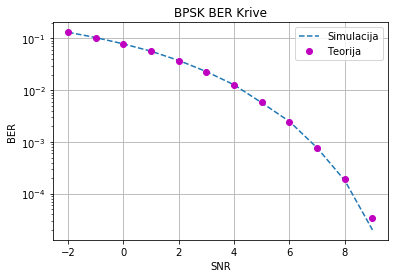

In [13]:
main()